# Homework #2 -->

---

# Question 1: Filter Bloom

#### (A) Filter Bloom implementation

In [1]:
import pandas as pd
import random
import numpy as np
import hashlib
import time

In [2]:
data = pd.read_csv("unique_ids.csv")
unique_ids = data['id'].values
allowed_ids = random.sample(list(unique_ids), 1000)
not_allowed_ids = random.sample(list(set(unique_ids) - set(allowed_ids)), 1000)
stream_data = allowed_ids + not_allowed_ids
random.shuffle(stream_data)

In [3]:
print(allowed_ids, '\n', not_allowed_ids)
print(stream_data)

[439459, 542514, 168593, 964078, 969070, 761860, 390383, 902298, 423549, 997872, 526905, 249565, 414306, 977243, 546443, 259588, 353021, 884115, 606021, 548691, 283024, 517110, 440431, 404314, 745353, 544297, 351203, 770292, 884078, 415433, 816873, 420692, 745499, 266716, 718773, 477999, 261768, 946023, 349462, 796818, 190890, 671913, 370802, 429353, 149615, 232268, 744224, 888859, 516016, 216555, 684871, 300465, 565992, 977987, 835546, 631277, 175250, 203270, 557912, 357246, 425761, 561868, 279429, 723728, 939479, 730266, 914314, 307032, 326164, 960087, 964063, 845519, 346553, 887494, 172049, 371931, 155587, 691789, 765963, 881685, 215914, 613781, 698895, 416741, 975082, 359604, 816802, 654399, 526910, 289615, 768684, 812626, 620665, 247715, 159033, 418402, 294886, 677796, 641179, 703326, 479237, 470325, 786537, 749738, 953777, 459294, 872997, 439206, 555382, 826842, 406436, 416803, 665422, 628593, 939696, 479058, 658232, 831560, 510132, 209811, 344610, 531475, 400994, 343619, 629193,

In [4]:
def hash_function(item, size, num_hash):
    hash_vals = []
    for i in range(num_hash):
        hash_res = int(hashlib.md5((str(item) + str(i)).encode()).hexdigest(), 16)
        hash_vals.append(hash_res % size)
    return hash_vals

In [5]:
def bloom_check(item, bit_arr, num_hash, size):
    return all(bit_arr[value] for value in hash_function(item, size, num_hash))    

<Strong style="color: purple; font-size:24pt;"> Bit Array Completion: </strong>

In [8]:
def bit_arr_completion(allowed_data, size, num_hash):
    bit_array = [0] * size
    for id in allowed_data:
        hash_vals = hash_function(id, size, num_hash)
        for val in hash_vals:
            bit_array[val] = 1
    return bit_array

<strong style="color: purple; font-size: 24pt"> Client-Server :</strong>

##### Server

In [45]:
k = 10
n = 10000
bit_arr = bit_arr_completion(allowed_ids, n, k)

In [29]:
def server_authentication(id, size, k):
    msg = ''
    stat = None
    if bloom_check(id, bit_arr, k, size):
        msg = f"ID {id} is Allowed."
        stat = True
    else:
        msg = f"ID {id} not Allowed."
        stat = False
        
    return stat, msg

##### Client

In [23]:
def stream(stream_data):
    for id in stream_data:
        yield id
        # time.sleep(0.5)
    

In [46]:
allowed = 0
not_allowed = 0
for id in stream(stream_data):
    stat, msg = server_authentication(id, n, k)
    if stat:
        allowed += 1
    else: 
        not_allowed += 1
        
    print(f"Message: {msg}, \n ")

print("_____________________________________________")
print(f"| Count of Allowed IDs: {allowed} \n ")
print(f"| Count of Not Allowed IDs: {not_allowed}")
print("_____________________________________________")

Message: ID 995192 is Allowed., 
 
Message: ID 554806 not Allowed., 
 
Message: ID 278250 is Allowed., 
 
Message: ID 292462 not Allowed., 
 
Message: ID 509282 is Allowed., 
 
Message: ID 497832 not Allowed., 
 
Message: ID 239325 not Allowed., 
 
Message: ID 560254 is Allowed., 
 
Message: ID 395701 is Allowed., 
 
Message: ID 425761 is Allowed., 
 
Message: ID 553526 not Allowed., 
 
Message: ID 765607 is Allowed., 
 
Message: ID 272766 not Allowed., 
 
Message: ID 166804 is Allowed., 
 
Message: ID 634592 is Allowed., 
 
Message: ID 600217 not Allowed., 
 
Message: ID 640612 not Allowed., 
 
Message: ID 407555 not Allowed., 
 
Message: ID 180473 not Allowed., 
 
Message: ID 450692 is Allowed., 
 
Message: ID 371233 is Allowed., 
 
Message: ID 237264 not Allowed., 
 
Message: ID 689263 is Allowed., 
 
Message: ID 336078 not Allowed., 
 
Message: ID 247694 not Allowed., 
 
Message: ID 701206 is Allowed., 
 
Message: ID 569695 is Allowed., 
 
Message: ID 334248 not Allowed., 
 
Messag

#### (B)

In [25]:
import matplotlib.pyplot as plt

In [40]:
num_hash_funcs = [5, 10, 20, 30, 50, 200]
bit_arr_sizes = [5000, 10000, 50000, 80000, 100000, 1000000]
result = {}
for k in num_hash_funcs:
    for n in bit_arr_sizes:
        bit_arr = bit_arr_completion(allowed_ids, n, k)
        allowed = 0
        not_allowed = 0
        for id in stream(stream_data):
            stat, msg = server_authentication(id, n, k)
            if stat:
                allowed += 1
            else: 
                not_allowed += 1
        result[(k, n)] = {'true': allowed, 'false': not_allowed} 

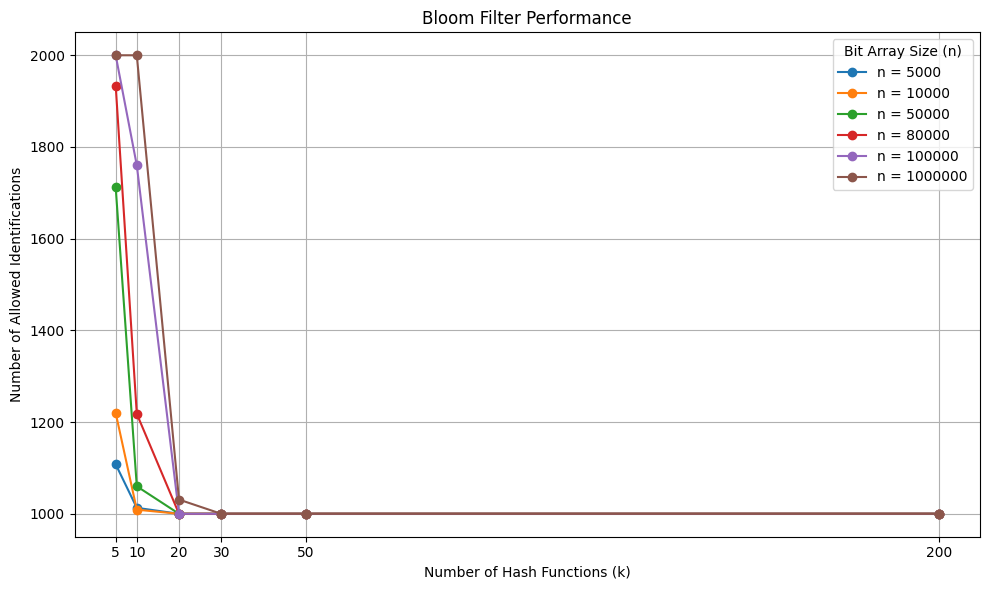

In [41]:
# Prepare data for plotting
X_axis = num_hash_funcs
Y_axis = bit_arr_sizes

# Extract results for plotting
true_counts = []
false_counts = []
for k in num_hash_funcs:
    true_row = []
    false_row = []
    for n in bit_arr_sizes:
        true_row.append(result[(k, n)]['true'])
        false_row.append(result[(k, n)]['false'])
    true_counts.append(true_row)
    false_counts.append(false_row)
    
# Plotting
plt.figure(figsize=(10, 6))
for i in range(len(bit_arr_sizes)):
    plt.plot(num_hash_funcs, true_counts[i], label=f'n = {bit_arr_sizes[i]}', marker='o')

plt.title('Bloom Filter Performance')
plt.xlabel('Number of Hash Functions (k)')
plt.ylabel('Number of Allowed Identifications')
plt.xticks(num_hash_funcs)
plt.legend(title='Bit Array Size (n)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### (C)

In [50]:
k = 7
n = 9600
bit_arr = bit_arr_completion(allowed_ids, n, k)

allowed = 0
not_allowed = 0
for id in stream(stream_data):
    stat, msg = server_authentication(id, n, k)
    if stat:
        allowed += 1
    else: 
        not_allowed += 1

print("_____________________________________________")
print(f"| Count of Allowed IDs: {allowed} \n ")
print(f"| Count of Not Allowed IDs: {not_allowed}")
print("_____________________________________________")

_____________________________________________
| Count of Allowed IDs: 1008 
 
| Count of Not Allowed IDs: 992
_____________________________________________
